Resumen inicial del dataset:
  subset1                                              path1 subset2  \
0   train  Lower_Deere_Camera_along_Bogus_Basin_Road_ID_9...    test   
1   train  Lower_Deere_Camera_along_Bogus_Basin_Road_ID_9...    test   
2   train  Lower_Deere_Camera_along_Bogus_Basin_Road_ID_9...    test   
3   train  Lower_Deere_Camera_along_Bogus_Basin_Road_ID_9...    test   
4   train  Lower_Deere_Camera_along_Bogus_Basin_Road_ID_9...    test   

                                               path2  distance  
0  20190609_Zooming back out as Sand Fire grows b...       136  
1  20190702_Quick confirmation of the Sycamore Fi...       122  
2  20200616_1st hour of the Walker Fire in Calave...       124  
3  20180903_The North Fire at sunset as seen from...       114  
4  20190511_Sugar Fire in the Tahoe National Fore...       122  


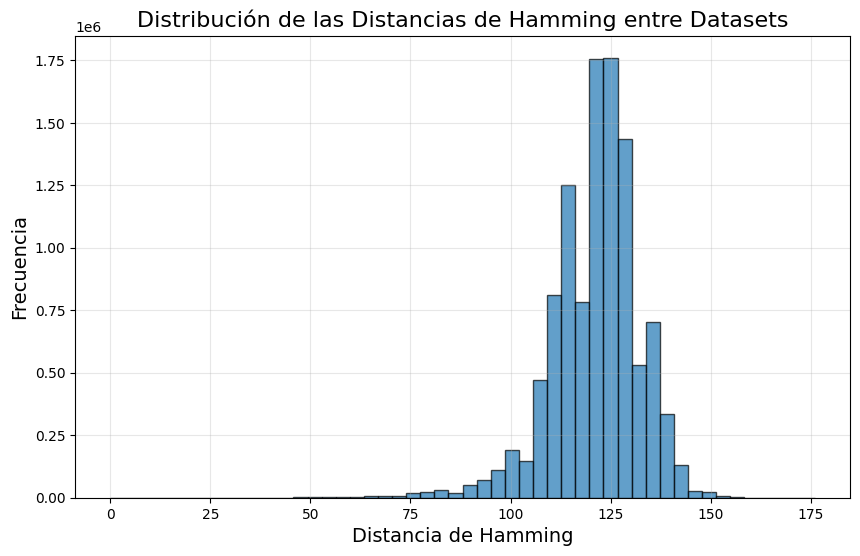


Resultados del análisis por umbral:
    threshold  images_to_remove
0           0                 8
1          10               271
2          20               509
3          30               705
4          40              1050
5          50              1449
6          60              1697
7          70              2025
8          80              2617
9          90              3861
10        100              6749
11        110              6937
12        120              6937
13        130              6937
14        140              6937
15        150              6937
16        160              6937
17        170              6937
18        180              6937
19        190              6937
20        200              6937
21        210              6937
22        220              6937
23        230              6937
24        240              6937
25        250              6937


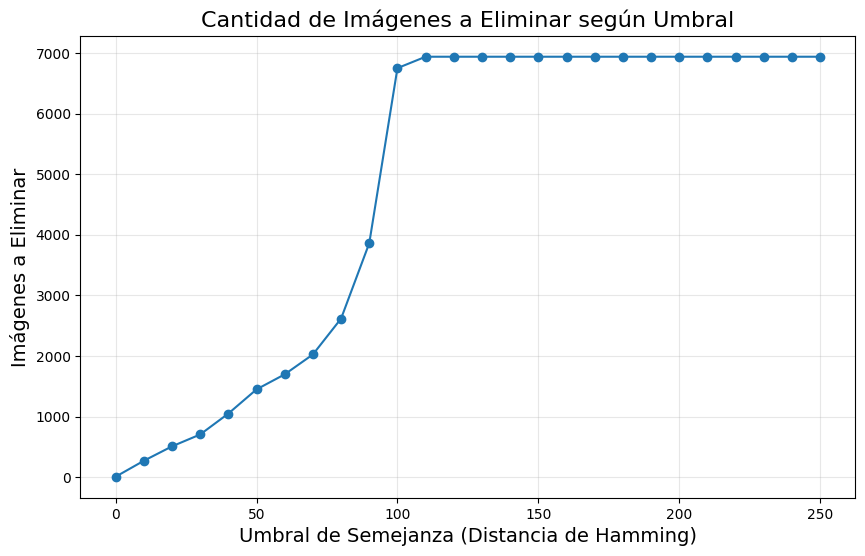

In [15]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con las distancias
csv_file = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024\hamming_distances_cross_datasets2.csv"  # Reemplaza con tu archivo
df = pd.read_csv(csv_file)

# Mostrar un resumen inicial del dataset
print("Resumen inicial del dataset:")
print(df.head())

# Visualizar la distribución de las distancias
plt.figure(figsize=(10, 6))
plt.hist(df['distance'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribución de las Distancias de Hamming entre Datasets', fontsize=16)
plt.xlabel('Distancia de Hamming', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Análisis de cuántas imágenes eliminar según distintos umbrales
thresholds = range(0, 257, 10)  # Umbrales de 0 a 256 (Hamming máximo) en pasos de 10
images_to_remove = []

for threshold in thresholds:
    # Filtrar pares de imágenes con distancia menor o igual al umbral
    similar_images = df[df['distance'] <= threshold]
    unique_hashes = set(similar_images['path1']).union(similar_images['path2'])
    images_to_remove.append(len(unique_hashes))

# Crear un DataFrame con los resultados
threshold_analysis = pd.DataFrame({
    'threshold': thresholds,
    'images_to_remove': images_to_remove
})

# Mostrar los resultados
print("\nResultados del análisis por umbral:")
print(threshold_analysis)

# Visualizar el número de imágenes a eliminar por umbral
plt.figure(figsize=(10, 6))
plt.plot(threshold_analysis['threshold'], threshold_analysis['images_to_remove'], marker='o')
plt.title('Cantidad de Imágenes a Eliminar según Umbral', fontsize=16)
plt.xlabel('Umbral de Semejanza (Distancia de Hamming)', fontsize=14)
plt.ylabel('Imágenes a Eliminar', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# # Seleccionar un umbral para el análisis
# selected_threshold = 50  # Cambiar según el criterio
# similar_images = df[df['distance'] <= selected_threshold]
# unique_images_to_remove = set(similar_images['hash1']).union(similar_images['hash2'])

# print(f"\nCon un umbral de {selected_threshold}:")
# print(f"Imágenes únicas a eliminar: {len(unique_images_to_remove)}")

# # Guardar las imágenes a eliminar en un archivo CSV
# output_file = 'images_to_remove.csv'
# pd.DataFrame({'hash': list(unique_images_to_remove)}).to_csv(output_file, index=False)
# print(f"Detalles guardados en: {output_file}")


In [ ]:
import pandas as pd

# Cargar el archivo CSV con las distancias
# csv_file = r"C:\Users\nicoi\OneDrive\Escritorio\wildfire2024\hamming_distances_same_dataset.csv"  # Reemplaza con tu archivo
# df = pd.read_csv(csv_file)

# Configurar el umbral para considerar imágenes como duplicadas/similares
similarity_threshold = 40  # Ajusta este valor según tu criterio

# Filtrar imágenes con distancia menor o igual al umbral
similar_images = df[df['distance'] <= similarity_threshold]

# Crear un conjunto único de imágenes a borrar
images_to_delete = set(similar_images['path1']).union(similar_images['path2'])

# Guardar las imágenes a borrar en un archivo TXT
output_file = 'images_to_delete2.txt'
with open(output_file, 'w') as f:
    for image in images_to_delete:
        f.write(image + '\n')

print(f"Lista de imágenes a borrar guardada en {output_file}. Total: {len(images_to_delete)} imágenes.")


Lista de imágenes a borrar guardada en images_to_delete2.txt. Total: 1050 imágenes.


: 